In [ ]:
import pandas as pd

Exploration / nettoyage dataset

In [ ]:
df = pd.read_csv('/home/jovyan/work/Data-Small/movies.csv')

In [ ]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df.shape

(9742, 3)

In [ ]:
df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
df.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [ ]:
df['genres'].unique()
#chaque film correspond à plusieurs genres donc on doit isoler chaque genre pour ensuite compter le nombre de genre

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [ ]:
#on transforme les string en listes
df['genres'] = df['genres'].apply(lambda x : x.split('|')) 
df['genres']

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [ ]:
#on cree autant de lignes que d'elements contenus dans les listes 
#(une liste par ligne)
genres = df['genres'].explode()

In [ ]:
genres

0       Adventure
0       Animation
0        Children
0          Comedy
0         Fantasy
          ...    
9738      Fantasy
9739        Drama
9740       Action
9740    Animation
9741       Comedy
Name: genres, Length: 22084, dtype: object

In [ ]:
#on ressort tous les genres
genres.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [ ]:
len(genres.unique())
#il y a 20 genres différents dont un 'no genres listed'

20

In [ ]:
#on retablit la colonne genres
df['genres'] = df['genres'].apply(lambda x : '|'.join(x)) 
df['genres']

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

In [ ]:
#onregarde le nombre de films associé à chaque genre
liste_genres = list(genres.unique())

liste_nombre = []
for genre in liste_genres:
    nb_films = df[df['genres'].str.contains(genre)].count()['movieId']
    print('{} films correspondent au genre {}.'.format(nb_films, genre))
    liste_nombre.append(nb_films)

1263 films correspondent au genre Adventure.
611 films correspondent au genre Animation.
664 films correspondent au genre Children.
3756 films correspondent au genre Comedy.
779 films correspondent au genre Fantasy.
1596 films correspondent au genre Romance.
4361 films correspondent au genre Drama.
1828 films correspondent au genre Action.
1199 films correspondent au genre Crime.
1894 films correspondent au genre Thriller.
978 films correspondent au genre Horror.
573 films correspondent au genre Mystery.
980 films correspondent au genre Sci-Fi.
382 films correspondent au genre War.
334 films correspondent au genre Musical.
440 films correspondent au genre Documentary.
158 films correspondent au genre IMAX.
167 films correspondent au genre Western.
87 films correspondent au genre Film-Noir.
34 films correspondent au genre (no genres listed).
/opt/venv/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.

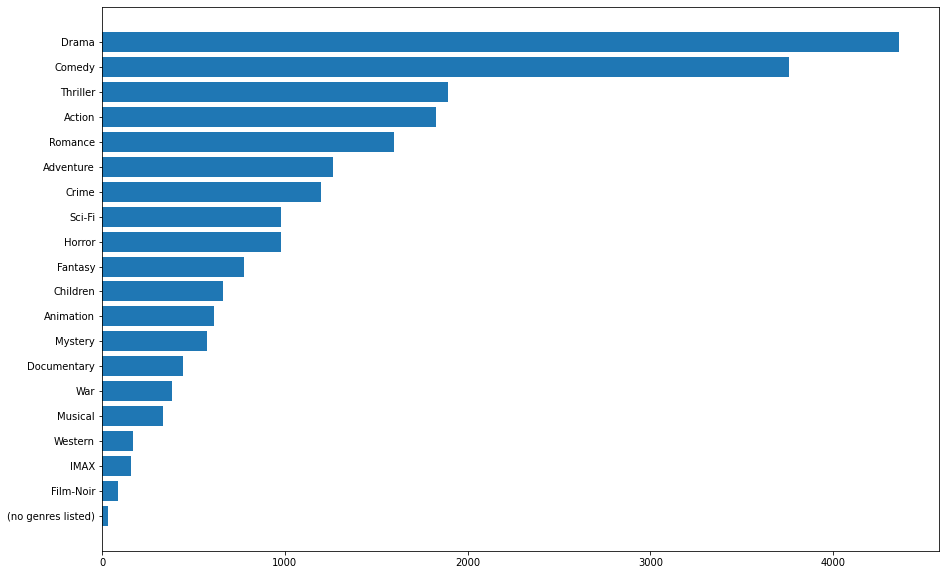

In [ ]:
#visualisation du nombre de films par genre
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15,10))


height = liste_nombre
bars = liste_genres

#tri de la liste height afin d'afficher les valeurs de la plus grande a la plus petite
unsorted_list = [(height, bars) for bars, height in zip(bars, height)]
sorted_list = sorted(unsorted_list)

bars_sorted = []
height_sorted = []

for i in sorted_list:
    bars_sorted += [i[1]]
    height_sorted += [i[0]]

graph = plt.subplot(111)
y_pos = np.arange(len(bars_sorted))
 
# graph
plt.barh(y_pos, height_sorted)
 
# legendes axe y, titre
plt.yticks(y_pos, bars_sorted)



plt.show()


In [ ]:
#pourcentage de chaque genre
liste_genres
liste_nombre

liste_perc = []

for i in range(len(liste_genres)):
    perc = liste_nombre[i]*100 / sum(liste_nombre)
    print('{}% des films correspondent au genre {}.'.format(round(perc, 2),liste_genres[i]))
    liste_perc.append(perc)

In [ ]:
#on regarde le nombre de genres par film

df['genres'] = df['genres'].apply(lambda x : x.split('|')) 

In [ ]:
df.head()

In [ ]:
#on cree une colonne avec la longueur de la liste de genres
df['nombre_genres'] = df['genres'].apply(lambda x : len(x))
df.head()

In [ ]:
df['nombre_genres'].value_counts().sort_values(ascending=False)

In [ ]:
#on veut voir si les films correspondant à '(no genres listed)' n'ont bien qu'un seul genre
#plus haut, on  vu qu 34 films correspondent au genre (no genres listed)
#on retablit la colonne genres telle qu'elle etait
df['genres'] = df['genres'].apply(lambda x : '|'.join(x))


In [ ]:
df.head()

In [ ]:
df[df['genres'].str.contains('(no genres listed)')]

#on a bien 34 lignes

In [ ]:
df[df['genres'].str.contains('(no genres listed)')]['nombre_genres'].unique()
#il n'y a bien qu'un seul genre correspondant à (no genres listed)

In [ ]:
#il faudra reflechir plus tard si on supprime les lignes dont les films n'on aucun genre (34 films), 
#notamment au moment de merger plusieurs datarames

DUMMIES

In [ ]:
#dummies des genres
df

In [ ]:
liste_genres

In [ ]:
for i in range(len(liste_genres)): # Les dummies (mettre une valeur là où ils se trouve la classifcation)
 df[liste_genres[i]] = df['genres'].str.contains(liste_genres[i])
 df[liste_genres[i]] = df[liste_genres[i]].apply(lambda x: 1 if x == True else 0)

 
df

In [ ]:
#df.to_csv('df.csv')

Test algo recommandation 1 film avec genres

In [ ]:
#test avec Neirest Neighbours pour la premiere etape (sans les ratings)

from sklearn.neighbors import NearestNeighbors

#on fit l'algo a notre dataset
neigh = NearestNeighbors(n_neighbors=2) #on met n_neighbors = 2 car si on met 1, la methode kneighbors nous ressortira lui-meme
# (car c'est le plus proche de lui-meme). 2 nous renverra lui-meme et le deuxieme plus proche.
neigh.fit(df.iloc[:,4:]) #on prend seulement les colonnes binaires des genres

In [ ]:
#on cree un array correspondant aux genres du film de l'input
#exemple avec Toy Story (1995) en input

input_movie = np.array(df[df['title']=='Toy Story (1995)'])[:,4:]

input_movie

In [ ]:
neigh.kneighbors(input_movie) #on applique la methode kneighbors pour trouver les 2 plus proches voisins
#il nous ressort lui meme (toy story) et le deuxieme plus proche (ainsi que les distances sur le premier array)

In [ ]:
closest = int(neigh.kneighbors(input_movie)[1][0,0]) # on recupere l'index du 1er element de l'array des plus proches voisins
closest

In [ ]:
#on va chercher le film correspondant a l'index closest dans le dataset

df[df.index == closest]

In [ ]:
df[df.index == closest].iloc[0,1] #on selectionne que le titre du film

In [ ]:
#creation de la fonction de recommandation avec un film en input et un film en output
#on reprend ce qu'on a fait au dessus avec Toy story

def recommand(movie):
    
    neigh = NearestNeighbors(n_neighbors=2) #on cherche le plus proche voisin (1 + lui-meme) (il sort l'array du plus proche voisin)

    neigh.fit(df.iloc[:,4:]) #on prend les colonnes binaires correspondants aux genres

    input_movie = np.array(df[df['title']==movie])[:,4:] #on cree un array a partir du film donné en input

    arr_closest = neigh.kneighbors(input_movie) #on applique la methode kneighbors qui nous ressort lui-meme + son plus proche voisin

    index_closest = list(arr_closest[1][0,:]) #on met les deux index dans une liste

    index_closest.remove(df[df['title'] == movie].index) #on supprime l'index qui correspond a lui meme dans la liste

    return df[df.index == index_closest[0]].iloc[0,1] #on recupere le titre du film correspondant à l'index qui reste (le plus proche voisin)
          


print(recommand('Shrek the Third (2007)'))

Test algo recommandation 5 films avec genres

In [ ]:
#on utilise le même process que le premier test

#on fit l'algo a notre dataset
neigh = NearestNeighbors(n_neighbors=6) #on met n_neighbors = 6 car on essaie de recommander 5 films. 6 = 5 + lui-même

neigh.fit(df.iloc[:,4:]) #on prend seulement les colonnes binaires des genres

In [ ]:
#on cree un array correspondant aux genres du film de l'input
#exemple avec Toy Story (1995) en input

input_movie = np.array(df[df['title']=='Toy Story (1995)'])[:,4:]

input_movie

In [ ]:
neigh.kneighbors(input_movie) #on applique la methode kneighbors pour trouver les 5 plus proches voisins
#il nous ressort lui meme (toy story) et les 5 plus proches (ainsi que les distances sur le premier array)

In [ ]:
index_closest = list(neigh.kneighbors(input_movie)[1][0,1:]) # on recupere une liste des indexes des 5 elements de l'array des plus proches voisins
index_closest

In [ ]:
df[df['title']=='Toy Story (1995)'].index

In [ ]:
#on va chercher les films correspondant aux indexes contenus dans la liste closest dans le dataset

df[df.index.isin(index_closest)]

In [ ]:
liste_recommandations = list(df[df.index.isin(index_closest)].iloc[:,1]) #on selectionne que le titre du film
liste_recommandations

In [ ]:
df

In [ ]:
#creation de la fonction pour recommander 5 films selon les genres


def recommand_5(movie):

    neigh = NearestNeighbors(n_neighbors=6) # on cherche les 5 plus proches voisins (5+lui-meme donc n_neighbors=6)

    neigh.fit(df.iloc[:,4:]) #on prend les colonnes binaires correspondants aux genres

    input_movie = np.array(df[df['title']==movie])[:,4:] #on cree un array a partir du film donné en input

    neigh.kneighbors(input_movie) #on applique la fonction kneighbors pour trouver les 5 plus proches. Elle nous ressort un array
                                    #avec les distances et un array avec les 5 plus proches + lui-meme

    index_closest = list(neigh.kneighbors(input_movie)[1][0,0:]) #on cree une liste d'index avec les 6 plus proches (dont lui-meme) à partir de l'array

    if df[df['title'] == movie].index.isin(index_closest):
        index_closest.remove(df[df['title'] == movie].index) #on supprime l'index qui correspond a lui meme s'il est dans la liste
    else:
        index_closest = list(neigh.kneighbors(input_movie)[1][0,:5]) #sinon, on sélectionne les 5 premiers index de la liste

    liste_recommandations = list(df[df.index.isin(index_closest)].iloc[:,1]) #on va chercher les titre de films correspondants aux 5 index restants
                                                                            #et on les stocke dans une liste
    
    return liste_recommandations


print(recommand_5('Grumpier Old Men (1995)'))